# Face Pose Estimator 

In this notebook, we will try to estimate the __pose (roll, pitch and yaw) of a face__:

<img src='images/face_poses.png' width=400>

In order to achieve this task, we're going to use only the pairwise distance between facial landmarks detected by [Dlib library](http://dlib.net):

<img src='images/dlib_landmarks.png' width=350>


## Dependencies 

In [112]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pickle
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Data 

For this problem, I created a toy database with __6288 images__. For each image, I detected the facial landmarks with Dlib (68 points) and computed the pairwise euclidean distance between all points. Thus, given 68 points $\{p_1, p_2, ..., p_{68}\}$ where $d(p_i, p_j) = d(p_j, p_i)$ and $d(p_i, p_i) = 0$, we ended up with $\frac{68*67}{2} = 2278$ features. In addition, once we will use Neural Networks to predict roll, pitch, and yaw at the same time, our response variable will have shape 6288x3.

In [113]:
#with open('data.pkl', 'wb') as f:
 ##   pickle.dump('data/AFLW2000_FF-GAN', f)
#print(data.pkl)    

In [114]:
#pickle_out = open('dataset.pickle' , 'wb')
#pickle.dump(AFLW2000_FF-GAN , pickle_out)
#pickle.out.close

In [115]:
#filename = 'data/AFLW2000_FF-GAN'
#outfile = open('data/AFLW2000_FF-GAN','wb')
#pickle.dump(AFLW2000_FF-GAN_dict,outfile)
#outfile.close()

In [116]:
x, y = pkl.load(open('data/samples.pkl', 'rb'))

print(x.shape, y.shape)

(6288, 2278) (6288, 3)


In [117]:
roll, pitch, yaw = y[:, 0], y[:, 1], y[:, 2]

print(roll.min(), roll.max(), roll.mean(), roll.std())
print(pitch.min(), pitch.max(), pitch.mean(), pitch.std())
print(yaw.min(), yaw.max(), yaw.mean(), yaw.std())

-46.06486893 43.00866699 -0.52579503197042 5.176231116713095
-29.88856888 34.09674835 2.584682740273537 7.962828151857226
-75.55059814 86.84925079 -0.11620588007315523 13.090839183150852


Let's divide you dataset in train, validation, and test

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(4401, 2278) (4401, 3)
(943, 2278) (943, 3)
(944, 2278) (944, 3)


and normalize it:

In [119]:
std = StandardScaler()
std.fit(x_train)
x_train = std.transform(x_train)
x_val = std.transform(x_val)
x_test = std.transform(x_test)

## Model

### Hyperparams 

In [120]:
BATCH_SIZE = 64
EPOCHS = 100

### Training

In [121]:
model = Sequential()
model.add(Dense(units=20, activation='relu', kernel_regularizer='l2', input_dim=x.shape[1]))
model.add(Dense(units=10, activation='relu', kernel_regularizer='l2'))
model.add(Dense(units=3, activation='linear'))

print(model.summary())

callback_list = [EarlyStopping(monitor='val_loss', patience=25)]

model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callback_list)
model.save('models/model.h5')

print()
print('Train loss:', model.evaluate(x_train, y_train, verbose=0))
print('  Val loss:', model.evaluate(x_val, y_val, verbose=0))
print(' Test loss:', model.evaluate(x_test, y_test, verbose=0))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 20)                45580     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 33        
Total params: 45,823
Trainable params: 45,823
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
69/69 [==============================] - 0s 6ms/step - loss: 64.6468 - val_loss: 51.2464
Epoch 2/100
69/69 [==============================] - 0s 2ms/step - loss: 41.9127 - val_loss: 39.5969
Epoch 3/100
69/69 [==============================] - 0s 2ms/step - loss: 38.5602 - val_loss: 39.0239
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss

Epoch 74/100
69/69 [==============================] - 0s 2ms/step - loss: 29.4579 - val_loss: 31.8581
Epoch 75/100
69/69 [==============================] - 0s 2ms/step - loss: 29.1911 - val_loss: 31.8460
Epoch 76/100
69/69 [==============================] - 0s 2ms/step - loss: 29.9543 - val_loss: 32.9310
Epoch 77/100
69/69 [==============================] - 0s 2ms/step - loss: 29.6617 - val_loss: 33.1191
Epoch 78/100
69/69 [==============================] - 0s 1ms/step - loss: 29.7498 - val_loss: 38.6230
Epoch 79/100
69/69 [==============================] - 0s 1ms/step - loss: 30.7939 - val_loss: 32.6910
Epoch 80/100
69/69 [==============================] - 0s 1ms/step - loss: 29.8520 - val_loss: 31.8538
Epoch 81/100
69/69 [==============================] - 0s 1ms/step - loss: 29.3207 - val_loss: 33.0147
Epoch 82/100
69/69 [==============================] - 0s 2ms/step - loss: 28.8287 - val_loss: 31.5034
Epoch 83/100
69/69 [==============================] - 0s 1ms/step - loss: 28.8888 

As we can see, our model achieved a good result even in testset. Since we are using the MSE as loss function, we can estimate our model has an error of $\pm$6º. You can try improve the model if you want before continuing. 

Let's visualize our training graph:

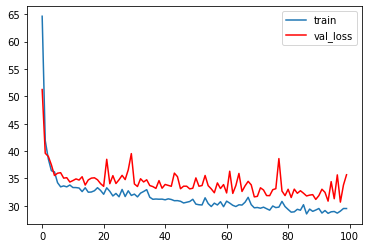

In [122]:
history = hist.history
loss_train = history['loss']
loss_val = history['val_loss']

plt.figure()
plt.plot(loss_train, label='train')
plt.plot(loss_val, label='val_loss', color='red')
plt.legend()

Good job! Our graph follows the patterns we expect when training deep learning models.

To finish our model analysis, we'll plot the difference between expected and predictions values:

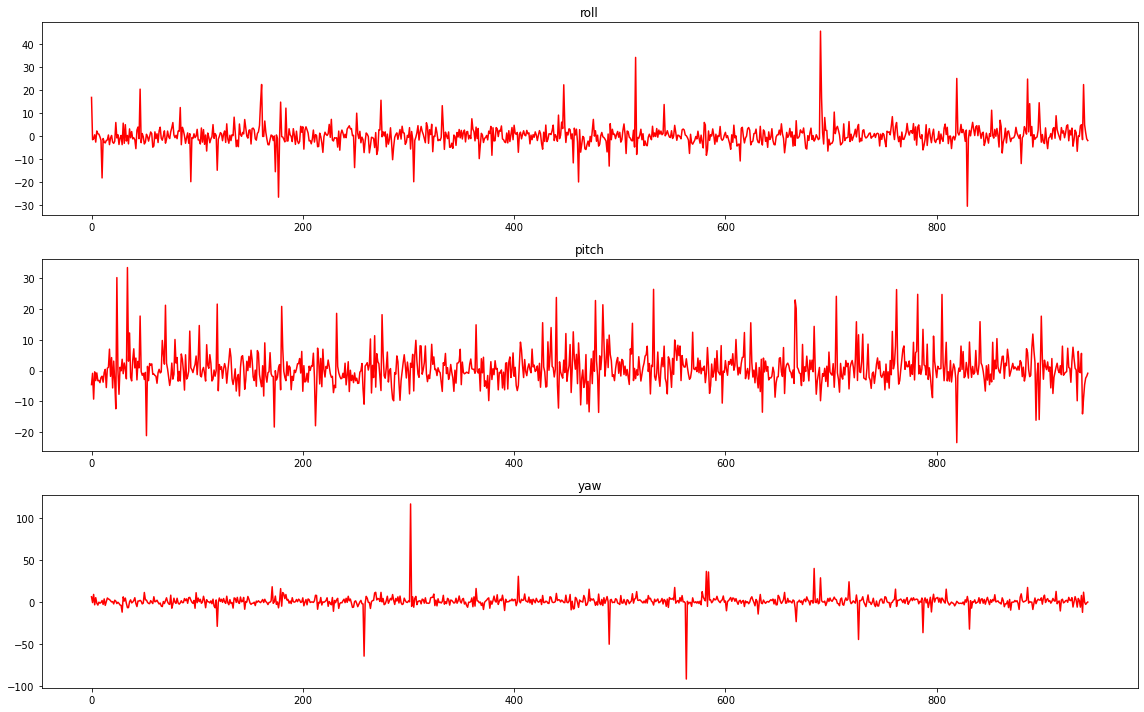

In [123]:
y_pred = model.predict(x_test)
diff = y_test - y_pred
diff_roll = diff[:, 0]
diff_pitch = diff[:, 1]
diff_yaw = diff[:, 2]

plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
plt.plot(diff_roll, color='red')
plt.title('roll')

plt.subplot(3, 1, 2)
plt.plot(diff_pitch, color='red')
plt.title('pitch')

plt.subplot(3, 1, 3)
plt.plot(diff_yaw, color='red')
plt.title('yaw')

plt.tight_layout()

As we can observe, the yaw was the easiest one to our model predict, followed by roll and pitch, respectively. However, we can observe some outliers in all graphs. We'll let to investigate them as future work. 

### Testing the model 

Now, we will test the model we've just trained. But first, you must have to download the [shape_model](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2) (if you haven't already) to be able to detect the facial landmarks. Download it and extract it in _models_ folder.

In [124]:
def detect_face_points(image):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("models/shape_predictor_68_face_landmarks.dat")
    face_rect = detector(image, 1)
    if len(face_rect) != 1: return []
    
    dlib_points = predictor(image, face_rect[0])
    face_points = []
    for i in range(68):
        x, y = dlib_points.part(i).x, dlib_points.part(i).y
        face_points.append(np.array([x, y]))
    return face_points
        
def compute_features(face_points):
    assert (len(face_points) == 68), "len(face_points) must be 68"
    
    face_points = np.array(face_points)
    features = []
    for i in range(68):
        for j in range(i+1, 68):
            features.append(np.linalg.norm(face_points[i]-face_points[j]))
            
    return np.array(features).reshape(1, -1)

If you wanna try it out with your own image, just paste it inside you _data_ folder and change the name in the first line bellow:

 Roll: 0.48°
Pitch: -3.43°
  Yaw: -4.14°


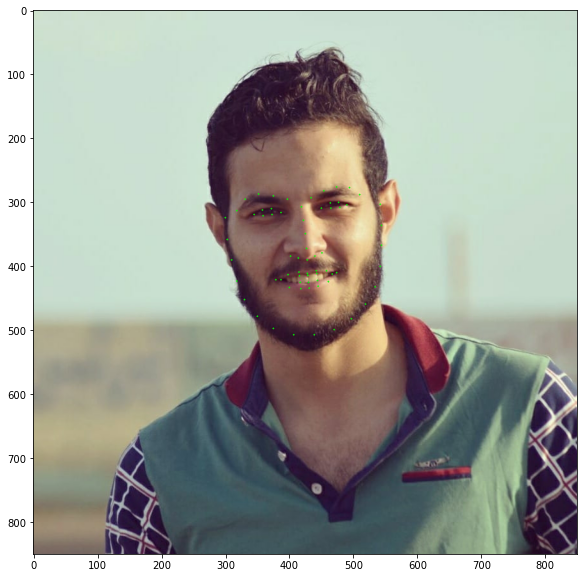

In [125]:
im = cv2.imread('data/Elsayed.jpg', cv2.IMREAD_COLOR)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
face_points = detect_face_points(im)

for x, y in face_points:
    cv2.circle(im, (x, y), 1, (0, 255, 0), -1)
    
features = compute_features(face_points)
features = std.transform(features)

model = load_model('models/model.h5')
y_pred = model.predict(features)

roll_pred, pitch_pred, yaw_pred = y_pred[0]
print(' Roll: {:.2f}°'.format(roll_pred))
print('Pitch: {:.2f}°'.format(pitch_pred))
print('  Yaw: {:.2f}°'.format(yaw_pred))
    
plt.figure(figsize=(10, 10))
plt.imshow(im)